<a href="https://colab.research.google.com/github/Huy987asd/BT/blob/main/Fuzzy_logic_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

90.0


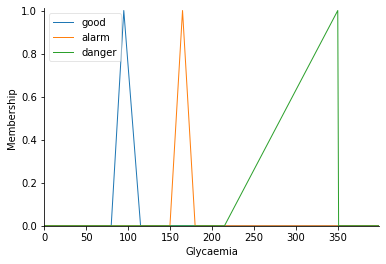

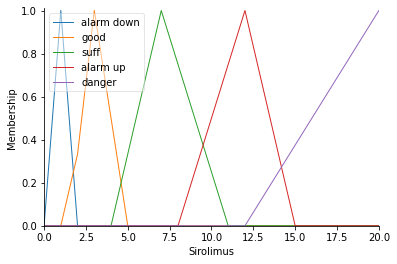

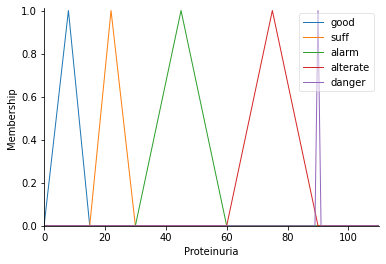

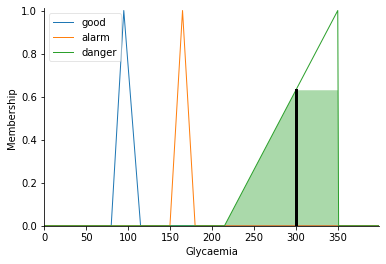

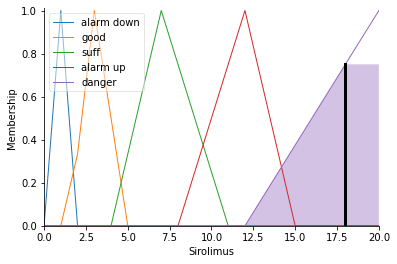

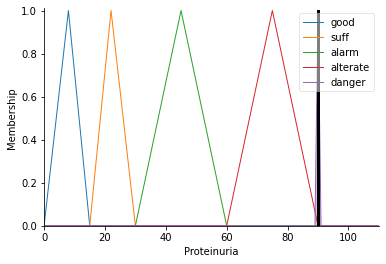

In [35]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Glycaemia = ctrl.Antecedent(np.arange(0, 400, 1), 'Glycaemia')
Sirolimus = ctrl.Antecedent(np.arange(0, 21, 1), 'Sirolimus')
Proteinuria = ctrl.Consequent(np.arange(0, 111, 1), 'Proteinuria')
Glycaemia['good'] = fuzz.trimf(Glycaemia.universe,[80,95,115])
Glycaemia['alarm'] = fuzz.trimf(Glycaemia.universe,[150,165,180])
Glycaemia['danger'] = fuzz.trimf(Glycaemia.universe,[215,350,350])
Sirolimus['alarm down'] = fuzz.trimf(Sirolimus.universe,[0,1,2])
Sirolimus['good'] = fuzz.trimf(Sirolimus.universe,[1.5,3,5])
Sirolimus['suff'] = fuzz.trimf(Sirolimus.universe,[4,7,11])
Sirolimus['alarm up'] = fuzz.trimf(Sirolimus.universe,[8,12,15])
Sirolimus['danger'] = fuzz.trimf(Sirolimus.universe,[12,20,20])
Proteinuria['good'] = fuzz.trimf(Proteinuria.universe,[0,8,15])
Proteinuria['suff'] = fuzz.trimf(Proteinuria.universe,[15,22,30])
Proteinuria['alarm'] = fuzz.trimf(Proteinuria.universe,[30,45,60])
Proteinuria['alterate'] = fuzz.trimf(Proteinuria.universe,[60,75,90])
Proteinuria['danger'] = fuzz.trimf(Proteinuria.universe,[90,90,90])
Glycaemia.view()
Sirolimus.view()
Proteinuria.view()

rule1 = ctrl.Rule(Glycaemia['good']& Sirolimus['good'], Proteinuria['good'])
rule2 = ctrl.Rule(Glycaemia['danger']& Sirolimus['danger'], Proteinuria['danger'])
rule3 = ctrl.Rule(Glycaemia['good']& Sirolimus['suff'], Proteinuria['suff'])
rule4 = ctrl.Rule(Glycaemia['alarm']& Sirolimus['alarm up'], Proteinuria['alarm'])
rule5 = ctrl.Rule(Glycaemia['alarm']& Sirolimus['suff'], Proteinuria['alterate'])
rule6 = ctrl.Rule(Glycaemia['good']& Sirolimus['alarm up'], Proteinuria['alterate'])
rule7 = ctrl.Rule(Glycaemia['alarm']& Sirolimus['good'], Proteinuria['suff'])
rule8 = ctrl.Rule(Glycaemia['good']& Sirolimus['alarm down'], Proteinuria['suff'])
Protempore_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8])
Protempore = ctrl.ControlSystemSimulation(Protempore_ctrl)
Protempore.input['Glycaemia'] = 300
Protempore.input['Sirolimus'] = 18

Protempore.compute()
print(Protempore.output['Proteinuria'])
Glycaemia.view(sim = Protempore)
Sirolimus.view(sim = Protempore)
Proteinuria.view(sim = Protempore)

In [3]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=f78cebf7f243a1fd6d24e4d5d524d9b75d23704355c06397af95d493172b0f95
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy
